<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 8
#### Benjamín Ithurburu

## Introducción
En este notebook se abordará la resolución de los ejercicios 1) y 2) de la TS8.

El primer ejercicio se basa en el punto #4 de la guía de filtros digitales. Abordando el análisis de distintos tipos de filtros tanto FIR como IIR, a partir de una red Direct Form 2.

En el segundo ejercicio, se analizará una red con una topología distinta al punto #1 y a partir de ella se buscará eliminar eficazmente diferentes valores de frecuencia.

### Ejercicio #1

<center><img src="./ej 4_1.png" width="1000"/></center>
<center><img src="./ej 4_2.png" width="1000"/></center>

### Ejercicio #2

<center><img src="./ej 2.png" width="800"/></center>

## Diseño/Desarrollo
A continuación, se adjunta la resolución de los distintos ejercicios.

In [1]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 8.pdf", width=1000, height=1000)

## Simulación Python

Inclución de librerías necesarias y preparación del entorno

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib ipympl
import numpy as np
from scipy import signal as sig
from scipy.signal import TransferFunction

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.sistemas_lineales import parametrize_sos, pzmap, GroupDelay, bodePlot, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

### Ejercicio #1.b: Filtro de media móvil

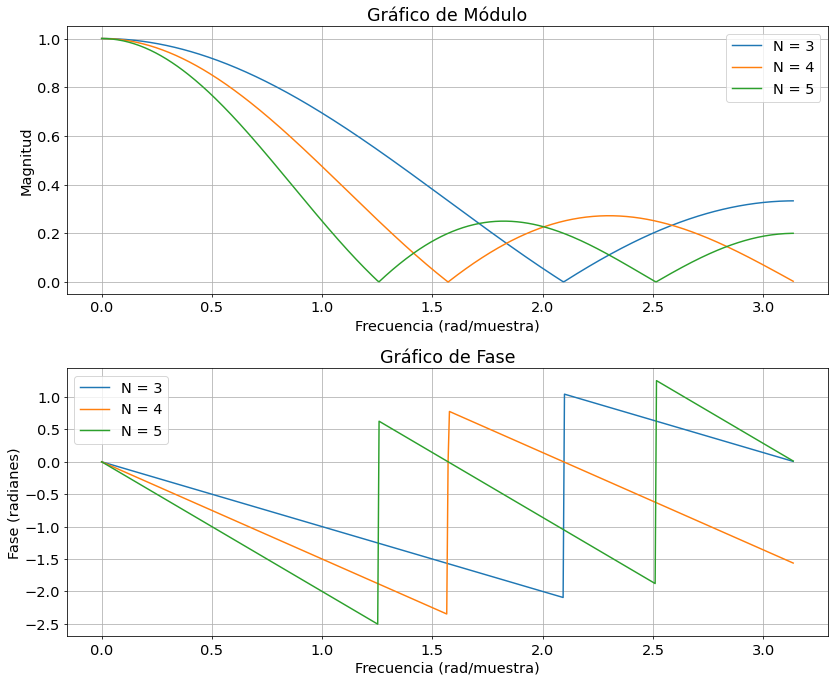

(3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

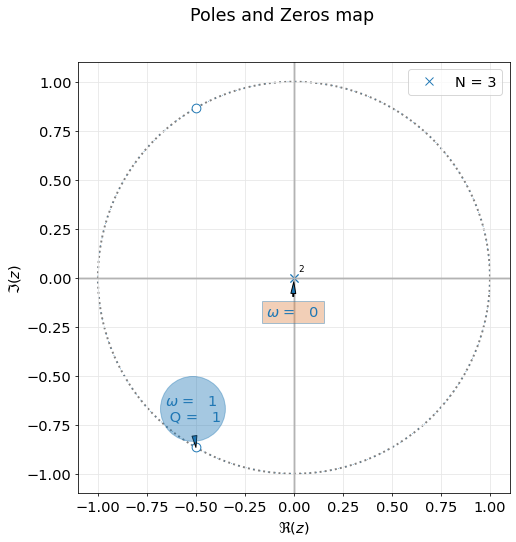

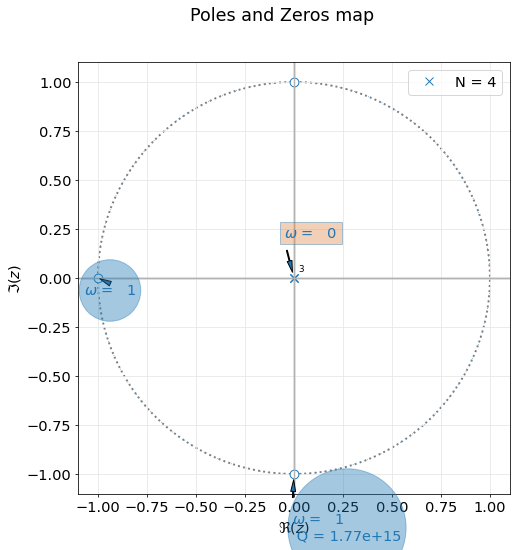

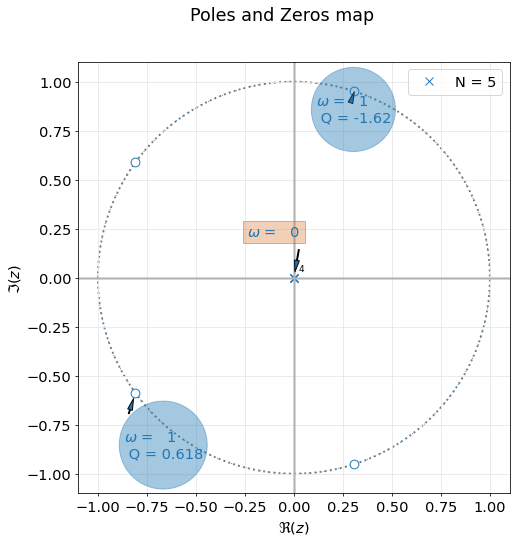

In [3]:
N_values = [3, 4, 5]

plt.figure(figsize=(12, 10))

for N in N_values:
    num = (1/N) * np.ones(N)
    den = [1]
    
    w, h = sig.freqz(num, den)
    
    # Gráfico de Módulo
    plt.subplot(2, 1, 1)  # Primera subgráfica
    plt.plot(w, np.abs(h), label=f'N = {N}')

    # Gráfico de Fase
    plt.subplot(2, 1, 2)  # Segunda subgráfica
    phase = np.angle(h)
    unwrapped_phase = np.unwrap(phase)
    plt.plot(w, unwrapped_phase, label=f'N = {N}')
    

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros para N = 3
N = 3
num1 = (1/N) * np.ones(N)
den1 = np.zeros(N)
den1[0] = 1     # Coeficiente para Z^N
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='N = 3')

# Gráfico de polos y ceros para N = 4
N = 4
num1 = (1/N) * np.ones(N)
den1 = np.zeros(N)
den1[0] = 1     # Coeficiente para Z^N
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='N = 4')

# Gráfico de polos y ceros para N = 5
N = 5
num1 = (1/N) * np.ones(N)
den1 = np.zeros(N)
den1[0] = 1     # Coeficiente para Z^N
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='N = 5')

El filtro de media móvil actúa como un filtro FIR simple, cuya respuesta en frecuencia depende del valor de N. A medida que N aumenta, la respuesta en magnitud se vuelve más suave, y la fase muestra un comportamiento lineal.

### Ejercicio #1.c: Filtro diferenciador

#### Diferenciador de primer orden

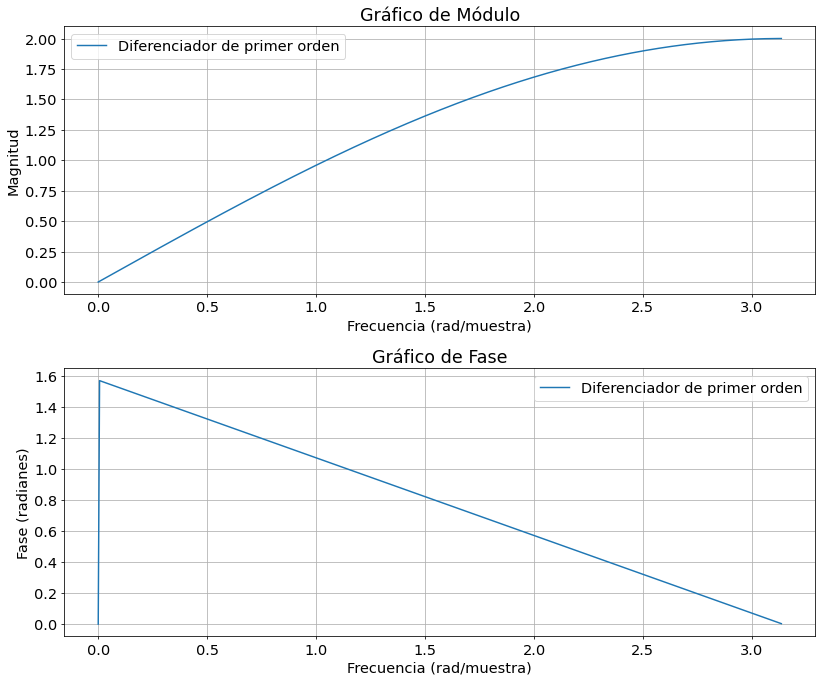

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

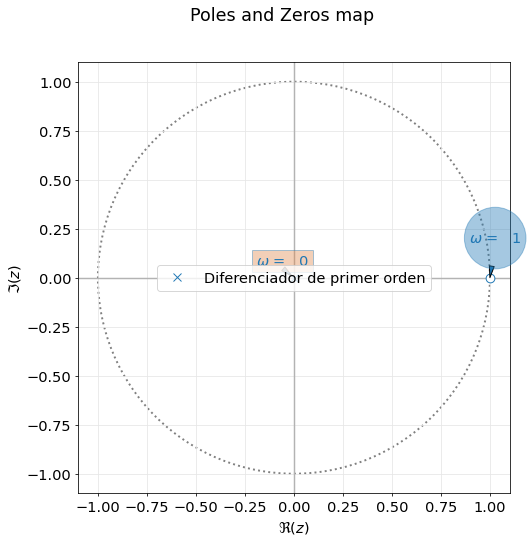

In [4]:
num = [1,-1]
den = [1]

w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w, np.abs(h), label=f'Diferenciador de primer orden')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, label=f'Diferenciador de primer orden')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [1,-1]
den1 = [1,0]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='Diferenciador de primer orden')

#### Diferenciador de segundo orden

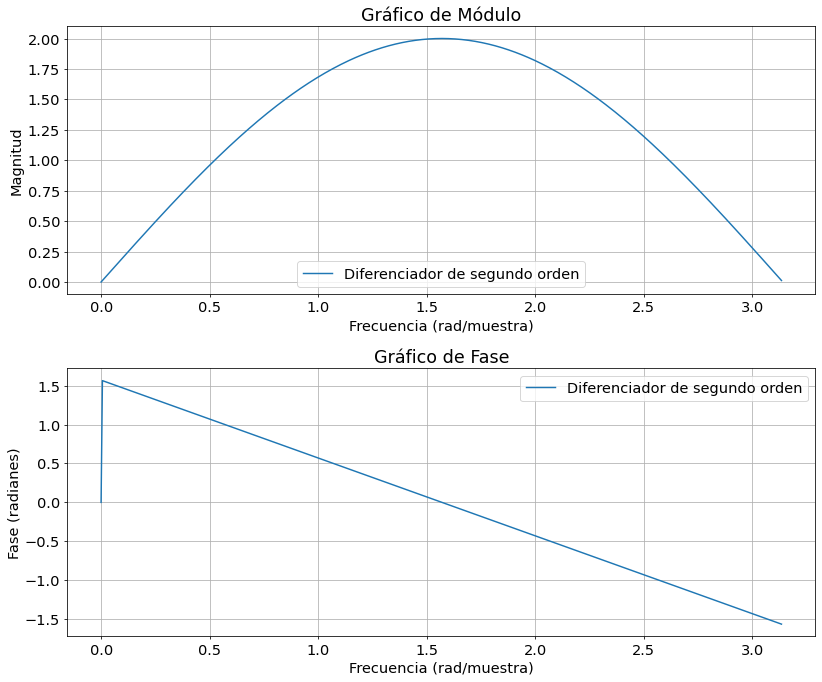

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

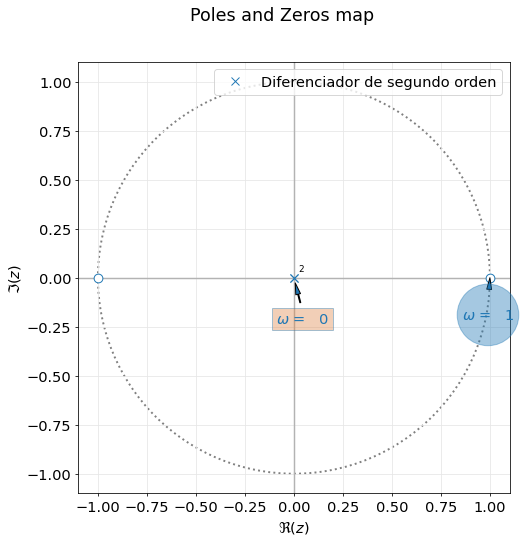

In [5]:
num = [1,0,-1]
den = [1]

w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w, np.abs(h), label=f'Diferenciador de segundo orden')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, label=f'Diferenciador de segundo orden')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [1,0,-1]
den1 = [1,0,0]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='Diferenciador de segundo orden')

### Ejercicio #1.d: Integrador con pérdidas

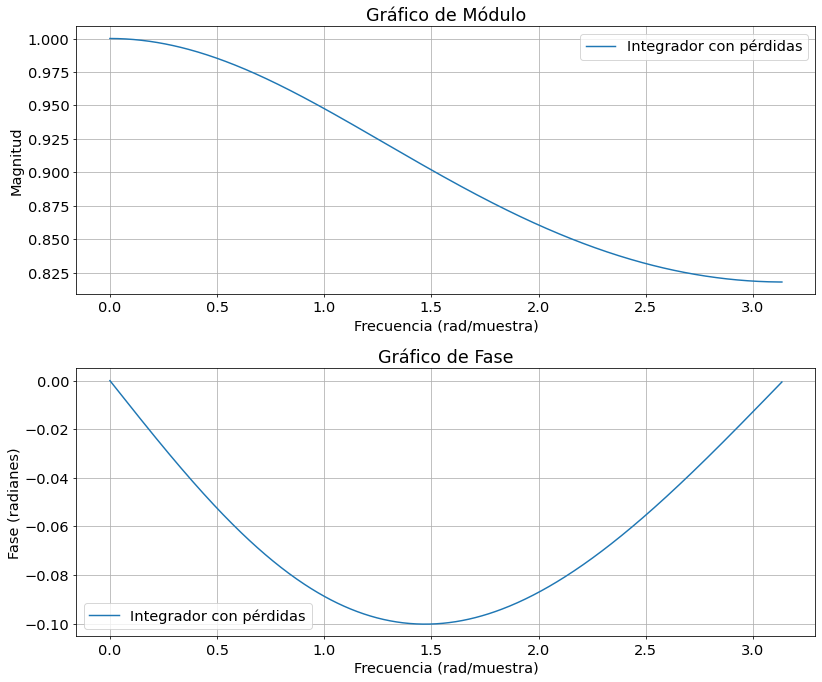

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

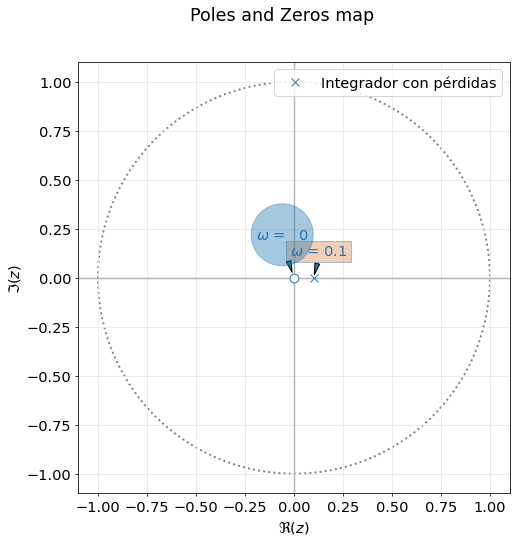

In [6]:
alpha = 0.9
num = [alpha]
den = [1,-(1-alpha)]

w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w, np.abs(h), label=f'Integrador con pérdidas')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, label=f'Integrador con pérdidas')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [alpha, 0]
den1 = [1,-(1-alpha)]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='Integrador con pérdidas')

### Ejercicio #1.e: Filtro elimina continua/DC Blocker 

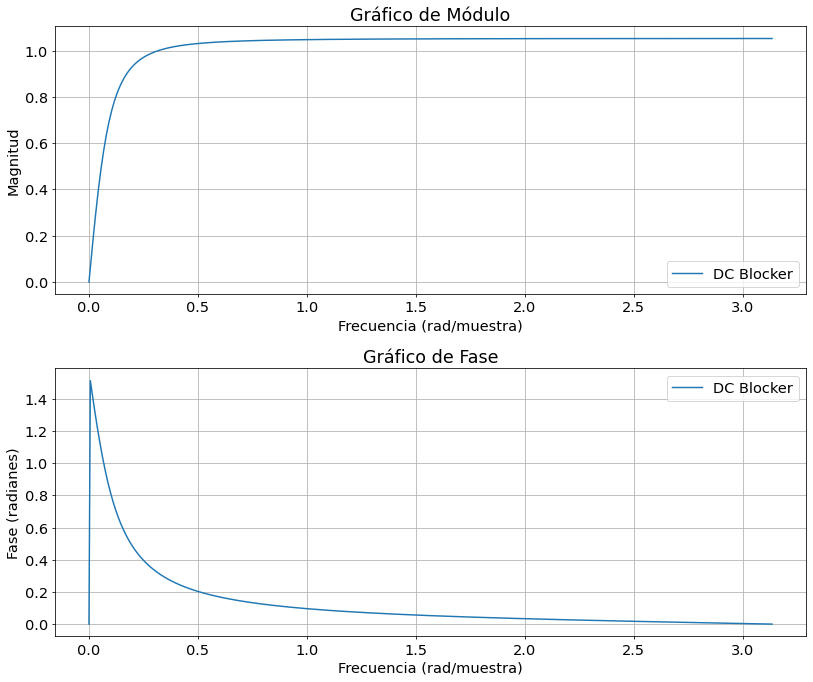

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

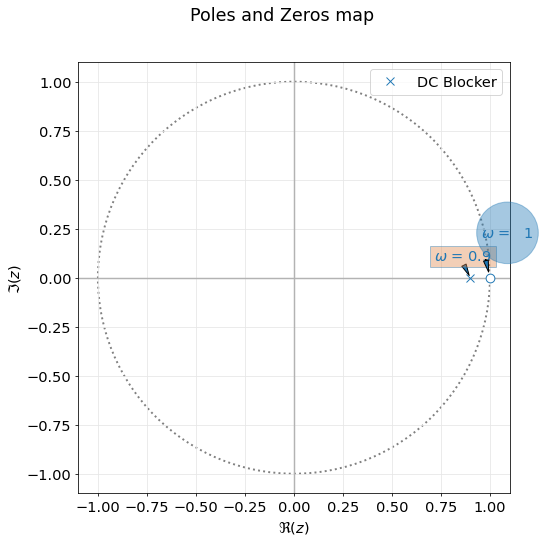

In [7]:
alpha = 0.9
num = [1,-1]
den = [1,-alpha]

w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w, np.abs(h), label=f'DC Blocker')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, label=f'DC Blocker')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [1,-1]
den1 = [1,-alpha]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='DC Blocker')

### Ejercicio #1.f: Filtro ecualizador de fase de primer orden

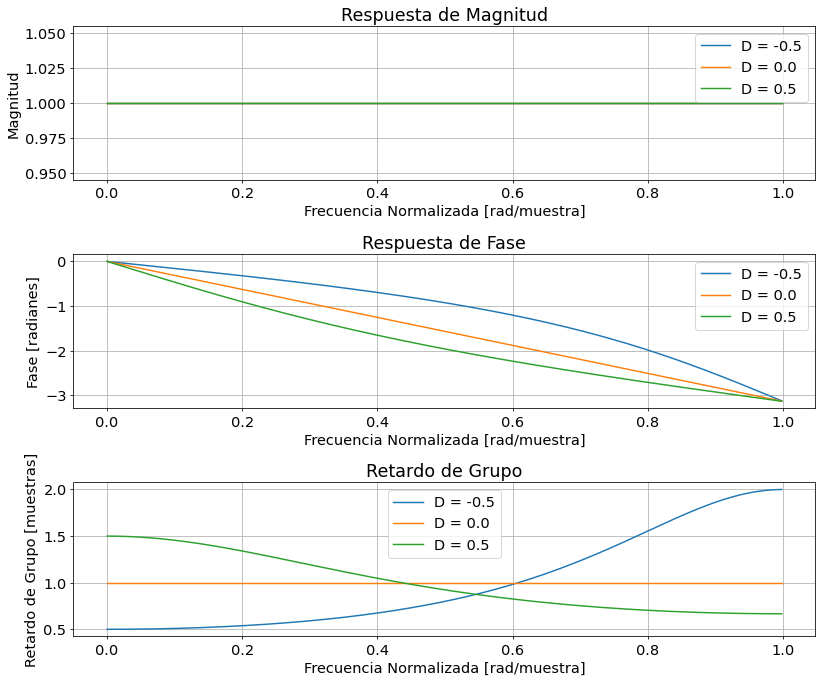

In [8]:
# Función para calcular el retardo de grupo
def calcular_retardo_grupo(num, den, frecuencias):
    _, retardo_grupo = sig.group_delay((num, den), w=frecuencias)
    return retardo_grupo

# Función para calcular el coeficiente R a partir de D
def calcular_R(D):
    return -D / (D + 2)

# Conjuntos de valores para D a analizar
valores_D = [-0.5, 0.0, 0.5]

# Crear la figura para los gráficos
plt.figure(figsize=(12, 10))

# Iterar sobre cada valor de D
for D in valores_D:
    # Obtener R para el valor actual de D
    R = calcular_R(D)

    # Definir los coeficientes del filtro
    num = [R, 1]  # Numerador
    den = [1, R]  # Denominador

    # Calcular la respuesta en frecuencia
    w, h = sig.freqz(num, den)
    frecuencias_normalizadas = w / np.pi  # Frecuencia normalizada (rad/muestra)

    # Magnitud de la respuesta
    magnitud = np.abs(h)

    # Fase de la respuesta (desenvuelta)
    fase = np.angle(h)
    fase_desenrollada = np.unwrap(fase)

    # Calcular el retardo de grupo
    valores_retardo_grupo = calcular_retardo_grupo(num, den, w)

    # Gráfico de magnitud
    plt.subplot(3, 1, 1)
    plt.plot(frecuencias_normalizadas, magnitud, label=f'D = {D}')
    plt.title('Respuesta de Magnitud')
    plt.xlabel('Frecuencia Normalizada [rad/muestra]')
    plt.ylabel('Magnitud')
    plt.grid()

    # Gráfico de fase
    plt.subplot(3, 1, 2)
    plt.plot(frecuencias_normalizadas, fase_desenrollada, label=f'D = {D}')
    plt.title('Respuesta de Fase')
    plt.xlabel('Frecuencia Normalizada [rad/muestra]')
    plt.ylabel('Fase [radianes]')
    plt.grid()

    # Gráfico de retardo de grupo
    plt.subplot(3, 1, 3)
    plt.plot(frecuencias_normalizadas, valores_retardo_grupo, label=f'D = {D}')
    plt.title('Retardo de Grupo')
    plt.xlabel('Frecuencia Normalizada [rad/muestra]')
    plt.ylabel('Retardo de Grupo [muestras]')
    plt.grid()

# Añadir leyendas a los gráficos
plt.subplot(3, 1, 1)
plt.legend()
plt.subplot(3, 1, 2)
plt.legend()
plt.subplot(3, 1, 3)
plt.legend()

# Ajustar la distribución y mostrar el gráfico
plt.tight_layout()
plt.show()

Podemos afirmar que el filtro de ecualización de fase de primer orden que hemos estudiado presenta un retardo de grupo bien definido y constante en las bajas frecuencias, con un comportamiento que coincide con el valor de 1+D muestras. Este filtro mantiene el retardo de grupo dentro de un margen del 5% para las frecuencias bajas, lo que lo hace apropiado para aplicaciones que requieren una compensación o ecualización de fase exacta en esta región del espectro. Por el contrario, en frecuencias altas, el retardo de grupo diverge, lo cual es lógico, dado que se puede observar que la fase no es lineal. 
Si se establece D=0, se puede lograr un filtro FIR que mantiene un retardo constante, evitando las distorsiones asociadas a los filtros IIR y asegurando que todas las frecuencias se procesen con la misma latencia

### Ejercicio #2.a

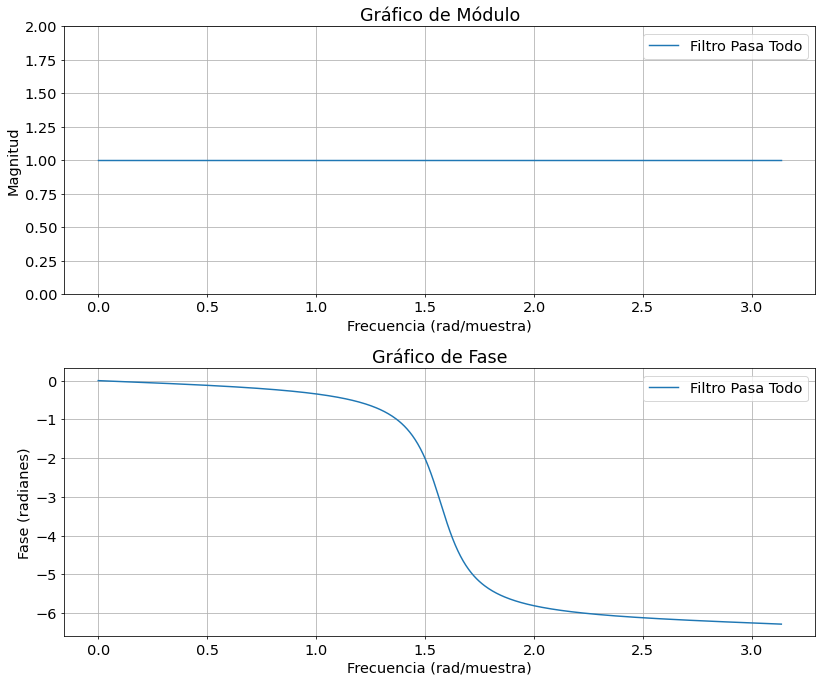

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

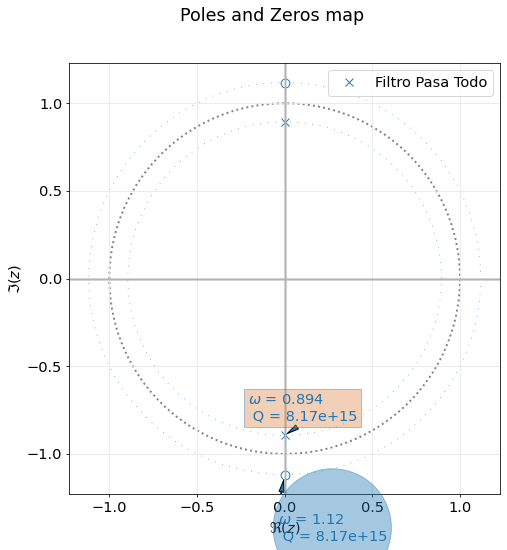

In [9]:
alpha = 0.8
M = 2

# Coeficientes del numerador y denominador
num = np.zeros(M + 1)
num[0] = alpha  # Coeficiente para Z^0
num[M] = 1     # Coeficiente para Z^{-M}

den = np.zeros(M + 1)
den[0] = 1     # Coeficiente para Z^0
den[M] = alpha  # Coeficiente para Z^{-M}

# Calcular la respuesta en frecuencia
w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w, np.abs(h), label=f'Filtro Pasa Todo')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, label=f'Filtro Pasa Todo')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.ylim([0, 2]) # Ajuste de límite del eje
plt.grid()


# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [alpha, 0, 1]
den1 = [1, 0, alpha]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='Filtro Pasa Todo')

### Ejercicio #2.b

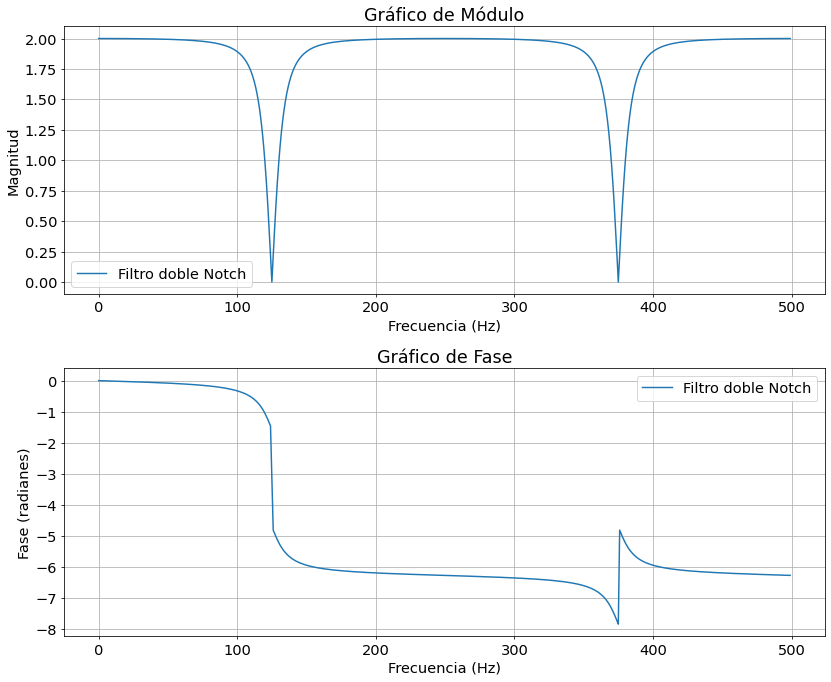

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

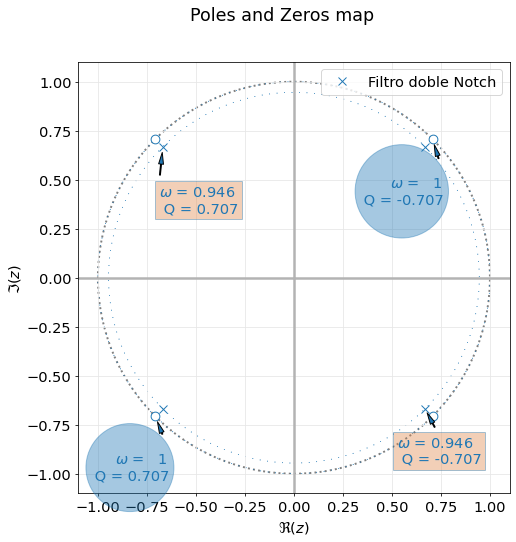

In [10]:
alpha = 0.8
M = 4
fs = 1000

# Coeficientes del numerador y denominador
num = np.zeros(M + 1)
num[0] = (1+alpha)  # Coeficiente para Z^0
num[M] = (1+alpha)  # Coeficiente para Z^{-M}

den = np.zeros(M + 1)
den[0] = 1     # Coeficiente para Z^0
den[M] = alpha  # Coeficiente para Z^{-M}

# Calcular la respuesta en frecuencia
w, h = sig.freqz(num, den)

plt.figure(figsize=(12, 10))
# Gráfico de Módulo
plt.subplot(2, 1, 1)  # Primera subgráfica
plt.plot(w*fs/(2*np.pi), np.abs(h), label=f'Filtro doble Notch')

# Gráfico de Fase
plt.subplot(2, 1, 2)  # Segunda subgráfica
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
plt.plot(w*fs/(2*np.pi), unwrapped_phase, label=f'Filtro doble Notch')

# Configuración para el gráfico de módulo
plt.subplot(2, 1, 1)
plt.title('Gráfico de Módulo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
#plt.ylim([0, 2]) # Ajuste de límite del eje
plt.grid()

# Configuración para el gráfico de fase
plt.subplot(2, 1, 2)
plt.title('Gráfico de Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gráfico de polos y ceros
num1 = [1+alpha, 0, 0, 0, 1+alpha]
den1 = [1, 0, 0, 0, alpha]
H = sig.TransferFunction(num1, den1, dt=1)
pzmap(H, True, filter_description='Filtro doble Notch')

Se puede observar en el diagrama de módulo en función de la frecuencia $f$, que las señales de 125 Hz y 375Hz son suprimidas eficazmente. Comportandose como un filtro Notch y cumpliendo con lo pedido. Además, fase muestra discontinuidades alrededor de las frecuencias eliminadas.

## Conclusión
Los ejercicios exploran diferentes tipos de filtros digitales, incluyendo FIR e IIR, con aplicaciones específicas como la eliminación de componentes no deseadas o la corrección de fase. El análisis y la simulación muestran cómo la estructura del filtro afecta la respuesta en frecuencia y fase, demostrando la importancia de ajustar los parámetros del filtro para cumplir con los objetivos de diseño.